# V.1
***
## a)

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

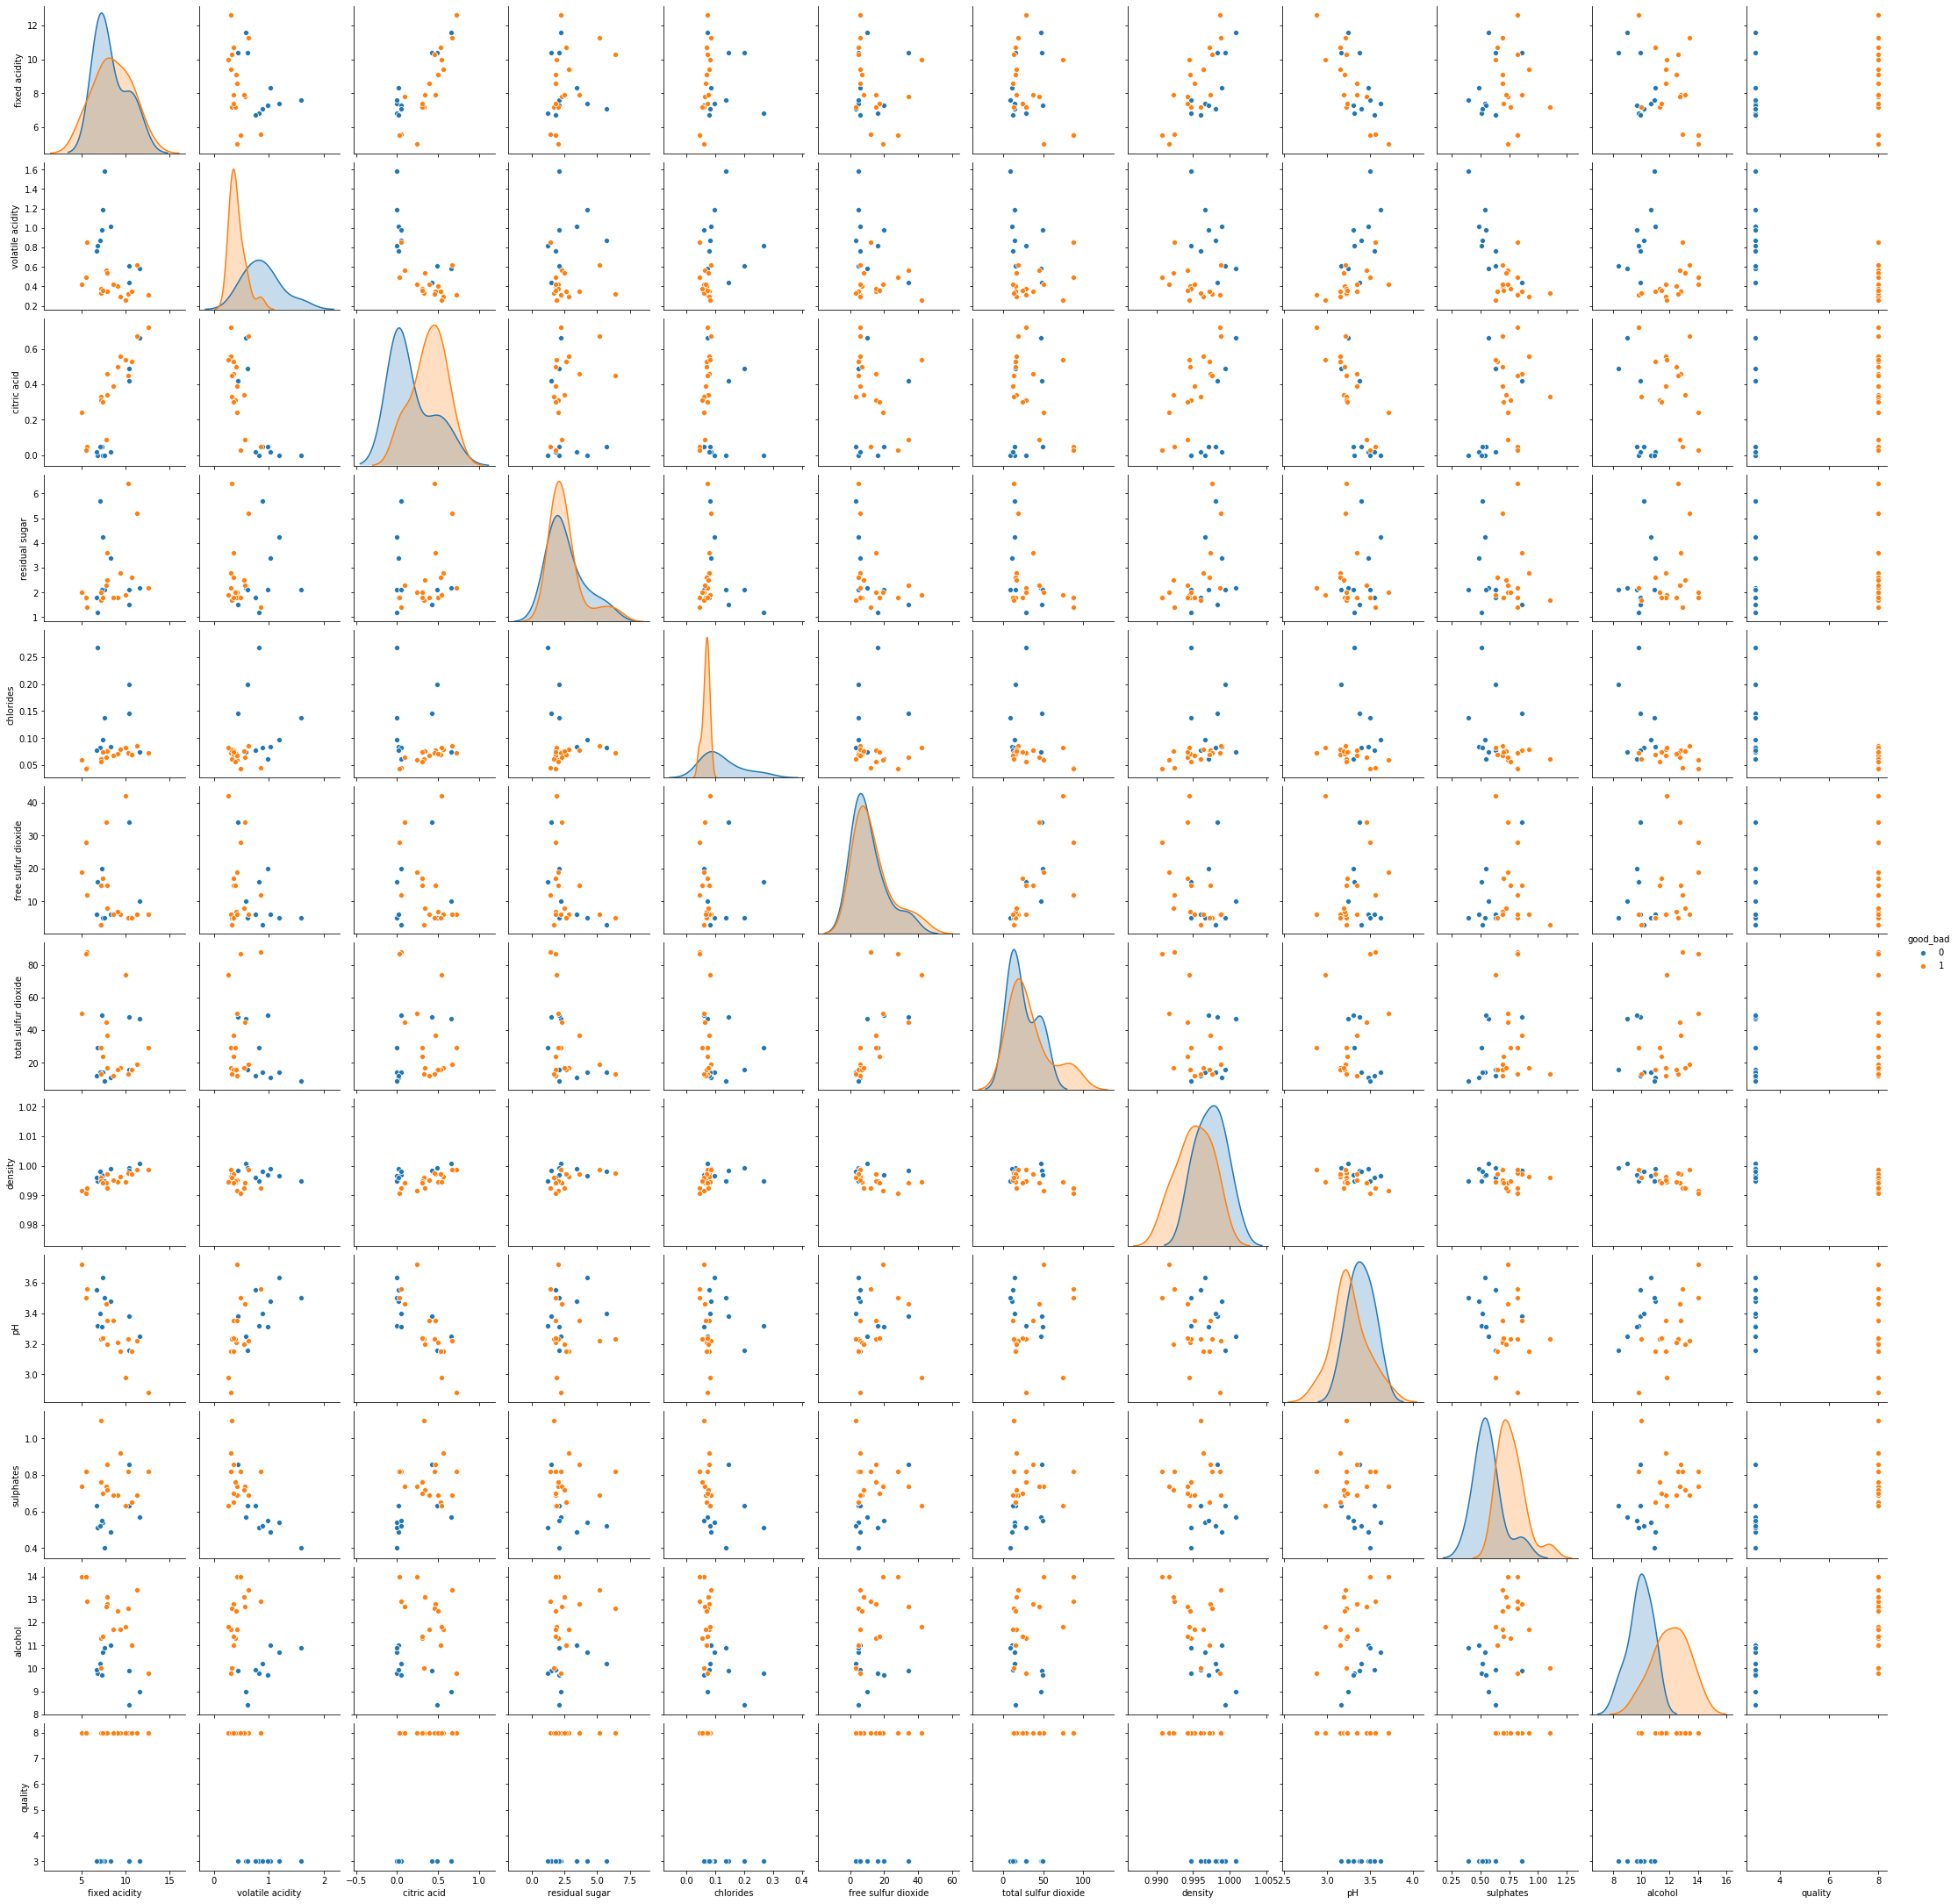

In [3]:
file = open("resources/winequality-red.csv")
df = pd.read_csv(file, sep=';')
good = 8 # Put your value to be considered as good wine
bad = 3 # Put your value to be considered as bad wine
save_png = True
plot_scatter_matrix(df, good, bad, save_png)

def good_bad_column(wine_data, good_wine, bad_wine):
    good_bad_matrix = []
    for data in wine_data["quality"]:
        if data >= good_wine:
            good_bad_matrix.append(1)
        elif data <= bad_wine:
            good_bad_matrix.append(0)
        else:
            good_bad_matrix.append(2)
    return good_bad_matrix

def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    wine_data.insert(loc=0, column="good_bad", value=good_bad_column(wine_data, good_threshold, bad_threshold))
    sorted_wine_data = wine_data.loc[wine_data["good_bad"] <= 1]
    features = ["good_bad", "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]
    sns.pairplot(sorted_wine_data.loc[:, features], hue="good_bad")
    if save_plot == True:
        plt.savefig('correlation.png')

## b)

The features that are the most likely to be useful during training of classifier are the following:
    1. volatile acidity
    2. chlorides
    3. alcohol

__We are looking for features that have very few correlations with other features, in this case we can see that chloride and acidity are both very distinctive. Alcohol is a bit less distinctive but we can still get something out of it. With very few samples like in this case, it's hard to clearly distinguish good from bad, but those are the few where it can be done.__
# V.2
## a)

In [7]:
file = open("resources/winequality-red.csv")
df = pd.read_csv(file, sep=';')
perceptron_rosenblatt_model(df)

def serie_to_array(serie):
    new_arr = []
    for e in serie:
        new_arr.append(e)
    return new_arr

def create_array(length, value):
    array = []
    for i in range(length):
        array.append(value)
    return array
    
def create_array_random(length):
    array = []
    for i in range(length):
        array.append(random.uniform(-1, 1))
    return array

def dot_product(w_list, x_list):
    dot_prod = 0
    for w, x in zip(w_list, x_list):
        dot_prod += (float(w) * float(x))
    return dot_prod

def heavside(neuron_value):
    if neuron_value >= 0:
        return 1
    return 0

def perceptron_rosenblatt_model(wine_data):
    features = ["x_0", "volatile acidity", "chlorides", "alcohol"]
    wine_data.insert(0, "x_0", create_array(len(wine_data), 1))
    wine_data = wine_data.loc[:, features]
    thetas = create_array_random(wine_data.shape[1])
    rosen_result = heavside(dot_product(thetas, serie_to_array(wine_data.iloc[1])))
    print(rosen_result)

1


## b)

In [12]:
file = open("resources/winequality-red.csv")
df = pd.read_csv(file, sep=';')
train_perceptron(df)

class rosenblattModel:
    def __init__(self, x, y, epochs=1000, learning_rate=0.1):
        self.x = x
        self.y = y
        self.epochs = epochs
        self.learning_rate = learning_rate
    

def train_perceptron(wine_data):
    wine_data.insert(loc=0, column="good_bad", value=good_bad_column(wine_data, 8, 3))
    sorted_wine_data = wine_data.loc[wine_data["good_bad"] <= 1]
    x = sorted_wine_data.loc[:, ["volatile acidity", "chlorides"]]
    y = sorted_wine_data.loc[:, "good_bad"]
    rosen = rosenblattModel(x, y, 2000, 0.1)


      volatile acidity  chlorides
267              0.350      0.078
278              0.320      0.073
390              0.850      0.045
440              0.310      0.072
455              0.620      0.086
459              0.580      0.074
481              0.300      0.080
495              0.350      0.070
498              0.350      0.070
517              0.610      0.200
588              0.420      0.060
690              1.185      0.097
828              0.570      0.065
832              0.440      0.145
899              1.020      0.084
1061             0.400      0.071
1090             0.260      0.083
1120             0.540      0.076
1202             0.420      0.068
1269             0.490      0.044
1299             1.580      0.137
1374             0.815      0.267
1403             0.330      0.061
1449             0.380      0.056
1469             0.980      0.061
1478             0.875      0.082
1505             0.760      0.078
1549             0.360      0.074
267     1
278 